<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

**Initialize the parameters**

In [112]:
gamma = 0.9
x = 0.25
y = 0.25
transitions = { 'a0': np.array([[0, 0, 0, 0], 
                  [0, 1 - x, 0, x], 
                  [1 - y, 0, 0, y], 
                  [1, 0, 0, 0]]) ,

         'a1': np.array([[0, 1, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0]]),
               
         'a2': np.array([[0, 0, 1, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0]])}

rewards = np.array([0, 0, 1, 10])
policies = np.array([['a1', 'a0', 'a0', 'a0'],
           ['a2', 'a0', 'a0', 'a0']])
states = np.array([0, 1, 2, 3])
V = np.random.rand(4) 
PI = np.array(['a1', 'a0', 'a0', 'a0'])

**Function creation**

In [113]:
def RMS(V0, V1):
  """
  Calculate the difference between two Utilities
  """
  return 1/len(states) * (((V0 - V1)**2).sum())

def max_sum(V, state, PI, policies, states):
  """
  Calculate the maximum of sum
  """
  max_sum = 0
  for (action, transition_matrix) in transitions.items():
    sum = np.dot(transition_matrix[state, :], V)
    if sum > max_sum:
      max_sum = sum
      PI[state] = action
  return max_sum

def Update_V(V, state, policies, PI, states):
  """
  Calculate and update V[state]
  """
  V[state] = rewards[state] + gamma * max_sum(V, state, PI, policies, states)
  return V[state] 

def plot(list_values):
    fig = plt.figure(figsize=(16, 9))
    plt.xlabel('epoch number')
    plt.ylabel('value')
    for i in range(len(V)):
      x = np.arange(len(list_values[i]))
      y = list_values[i]
      plt.plot(x, y, label="V"+str(i))
      plt.legend(loc='best')

**Code Testing**

V before trainging:  [0.06552415 0.33944812 0.95250118 0.31088961]
PI before trainging:  ['a1' 'a0' 'a0' 'a0']
V after trainging:  [14.15495795 15.73764415 15.6709756  22.73946215]
PI after trainging:  ['a1' 'a0' 'a0' 'a0']


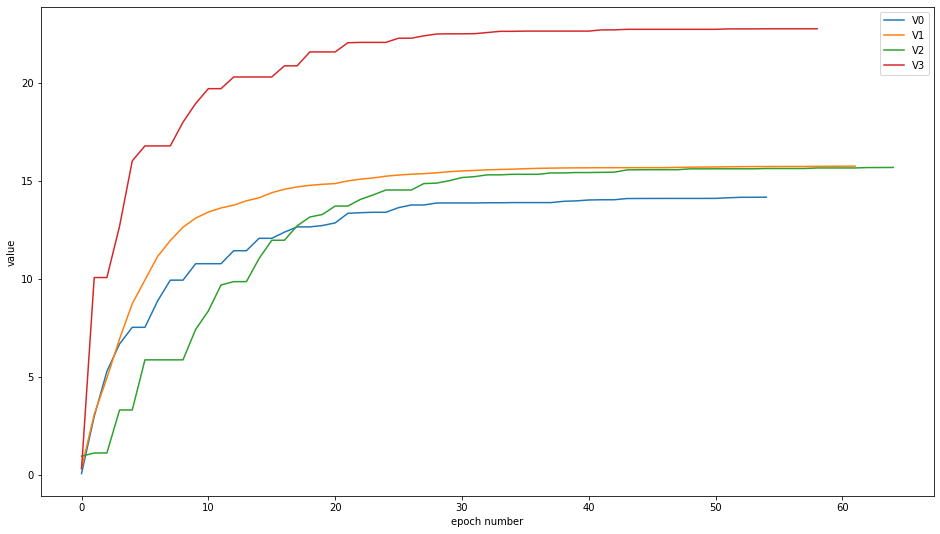

In [114]:
epsilon = 0.0001
epoch = 500
# variable to store every training result, which will further used to plot
list_values = [[V[0]], [V[1]], [V[2]], [V[3]]]
print('V before trainging: ', V)
print('PI before trainging: ', PI)
counter = 0
new_V = 0

for m in range(epoch):
  state = random.randint(0, 3)     # initialize randomly first state
  old_V = new_V
  new_V = Update_V(V, state, policies, PI, states)       # update V value
  list_values[state].append(new_V)
  if counter > 50:                    # set a counter to avoid the overfitting 
    break
  elif RMS(old_V, new_V) < epsilon:
    counter += 1

print('V after trainging: ', V)
print('PI after trainging: ', PI)
plot(list_values)